In [1]:
import os
import glob
import subprocess
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import freeze_support
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!rm -rf ./out
!mkdir ./out

In [3]:
cur_dir = %pwd

In [4]:
in_files = glob.glob(os.path.join(cur_dir, 'in', '*.txt'))
test_cases = [os.path.basename(f) for f in in_files]   

In [5]:
df = pd.read_csv("test_res.csv", index_col=0)
d = {}

In [6]:
def exec(in_file: str):
    out_file = os.path.join(cur_dir, 'out', os.path.basename(in_file))
    res = subprocess.run(f"./main < {in_file} > {out_file}", shell=True, stderr=subprocess.PIPE)
    s = res.stderr.decode('utf-8').strip().split('\n')[-1].strip()
    test_case = os.path.basename(in_file)
    d[test_case] = int(s)

In [7]:
freeze_support()
with ThreadPoolExecutor(max_workers=50) as executor:
    executor.map(exec, in_files)

cur_time = datetime.datetime.now().isoformat()
df[cur_time] = d

In [8]:
df = df.sort_index()

In [9]:
df.to_csv("test_res.csv")

In [10]:
df = df.iloc[:, -5:]
df = df.applymap(lambda x: np.log10(x) if x > 0 else 0)

In [11]:
df.describe()

,2023-12-23T17:58:30.100644,2023-12-25T16:44:56.135549,2023-12-25T17:03:55.887693,2023-12-25T18:21:57.182957,2023-12-26T09:54:19.285649
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.313739,5.392127,5.448760,5.441431,5.551478
std,1.184529,1.230059,1.234352,1.230744,1.272475
min,0.000000,3.173478,2.053078,2.666518,2.269513
25%,4.435554,4.419095,4.476991,4.476367,4.579717
50%,5.134679,5.240736,5.311505,5.268442,5.392903
75%,6.008953,6.085832,6.154780,6.144016,6.280986
max,9.526210,9.729033,9.742189,9.729033,9.707227


In [12]:
df.iloc[:, -1].mean()

5.551478079083489

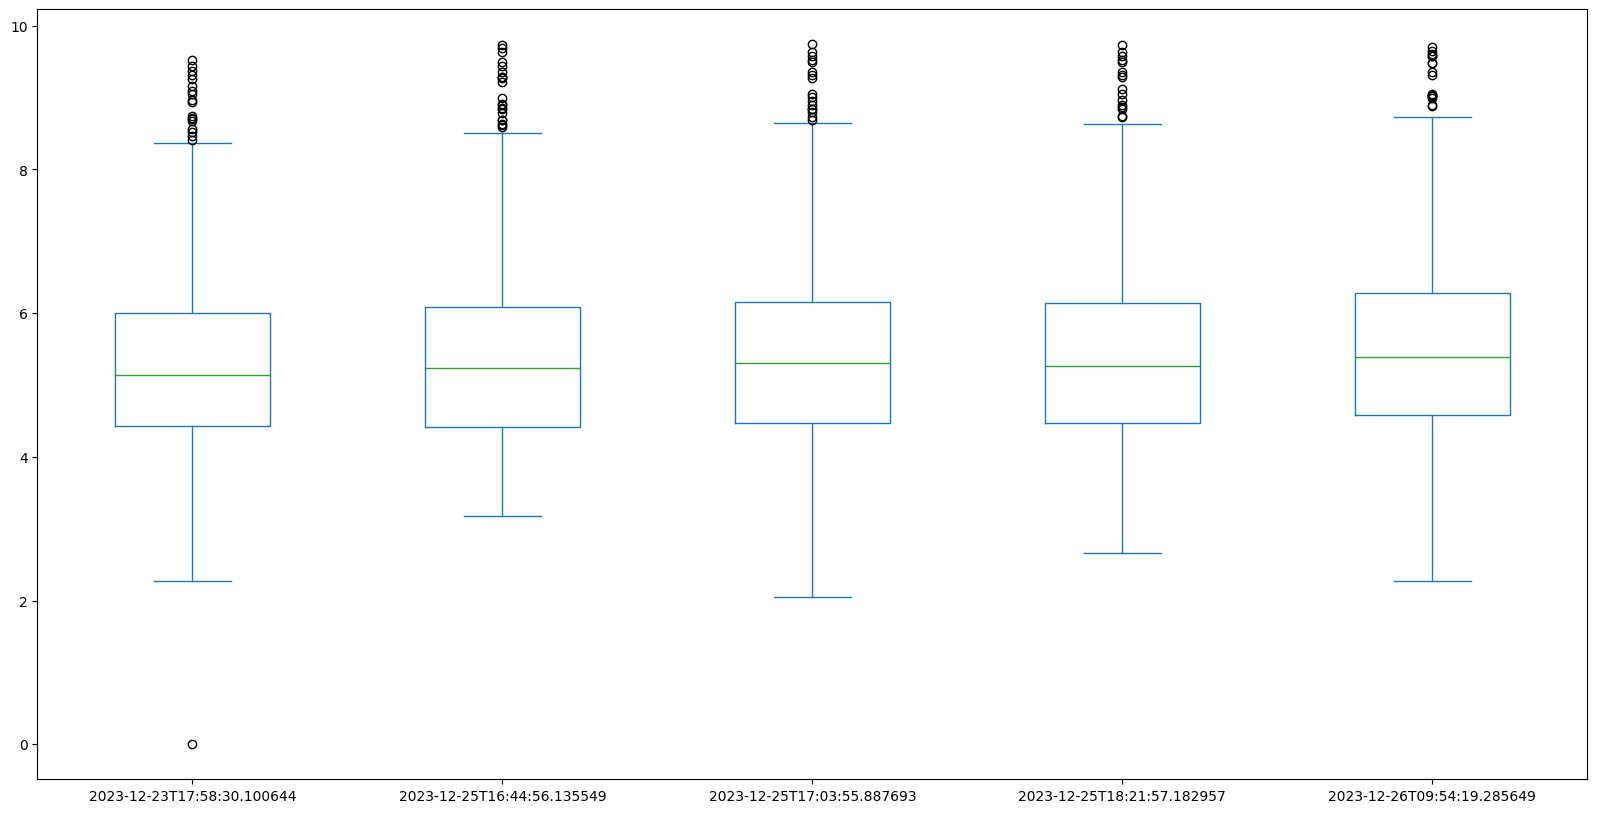

In [13]:
df.plot(kind="box", figsize=(20, 10))
plt.show()

In [14]:
df.sort_values(by=[cur_time], ascending=False)

,2023-12-23T17:58:30.100644,2023-12-25T16:44:56.135549,2023-12-25T17:03:55.887693,2023-12-25T18:21:57.182957,2023-12-26T09:54:19.285649
0696.txt,7.821986,9.283238,9.279426,9.283238,9.707227
0369.txt,9.526210,9.729033,9.742189,9.729033,9.648585
0517.txt,9.320353,9.352180,9.576977,9.576977,9.609155
0759.txt,9.443366,9.688696,9.523461,9.523461,9.585633
0684.txt,8.707094,9.634218,9.634218,9.634218,9.580573
...,...,...,...,...,...
0317.txt,3.653791,3.295787,3.361161,3.273001,3.342817
0182.txt,3.666799,3.173478,3.244277,3.207365,3.311754
0315.txt,4.138050,3.796436,3.917611,3.919706,3.186391
0064.txt,3.831102,3.851686,3.850769,3.849788,2.926342


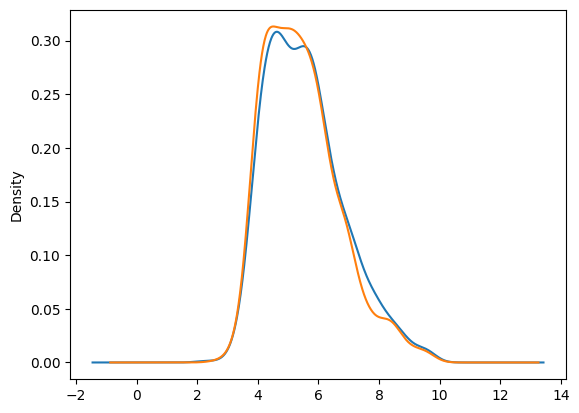

In [19]:
# bins = np.linspace(0, 10, 40)
last_sel = df.iloc[:, -1]
last_sel.plot.kde()
last2_sel = df.iloc[:, -2]
last2_sel.plot.kde()
plt.show()

In [16]:
last_df = df.iloc[:, -1]
wins = df.sub(last_df, axis=0)<0
loses = df.sub(last_df, axis=0)>0
win_cnt = wins.sum(axis=0)
lose_cnt = loses.sum(axis=0)
(win_cnt - lose_cnt).sort_index(ascending=False)

2023-12-26T09:54:19.285649      0
2023-12-25T18:21:57.182957    327
2023-12-25T17:03:55.887693    306
2023-12-25T16:44:56.135549    499
2023-12-23T17:58:30.100644    400
dtype: int64